# (Individualize) Plotting script

In [1]:
import os
os.chdir("C:/Users/Konstantin/Desktop/noto/")

import models

import pickle as pkl
import pandas as pd

from tqdm import tqdm
from plotting.wrapper import wrap_plot as plot

chunk_size = 10000



In [2]:
with open(os.path.join("custom_topics.pkl"), "rb") as t:
    custom_topics = pkl.load(t)

    dfs = []

    documents = os.listdir("noto")

    file_chunks = [documents[i:i + chunk_size] for i in range(0, len(documents), chunk_size)]

    c = 1
    for file_chunk in file_chunks:
        loop = tqdm(file_chunk)
        loop.set_description_str("Batch {} of {}".format(c, len(file_chunks)))

        docs = []

        corrupted_files = 0

        for doc_file in loop:
            with open(os.path.join("noto", doc_file), "rb") as d:
                try:
                    document = pkl.load(d)

                    if document.topic_information is not None and document.topic_information != "spam":
                        docs.append(document)

                except EOFError as _:
                    corrupted_files += 1
                    loop.set_postfix_str("Corrupted files: {}".format(corrupted_files))

                d.close()

        chunk_df = pd.DataFrame([vars(doc) for doc in docs])
        dfs.append(chunk_df)

        c += 1

    df = pd.concat(dfs)

Batch 18 of 18: 100%|██████████| 5884/5884 [00:13<00:00, 428.33it/s]


In [9]:
df = pd.concat(dfs)

In [10]:
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d%H%M%S")
df["date"] = df["date"].dt.round('1h')

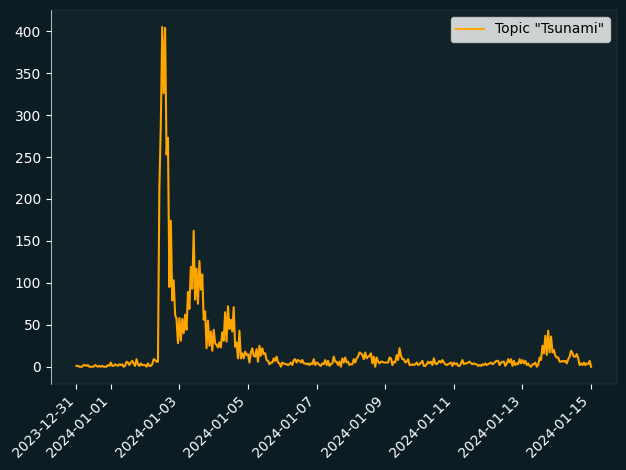

In [11]:
topic = "Tsunami"

group_holidays = df.groupby(by="date")["topic_information"].apply(
    lambda x: (x == topic).sum()).reset_index(
    name="count")
plot(group_holidays["date"], group_holidays["count"], plot_type="line",
     color="orange", legend=True, legenddata=["Topic \"{}\"".format(topic)])